# Assignment 3

**Submission deadline: last lab session before or on Thursday, 30.3.17**

**Points: 12 + 3 bonus points**


## Downloading this notebook

This assignment is an Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments. Follow the instructions in its README for instructions.

For programming exerciese add your solutions to the notebook. For math exercies please provide us with answers on paper or type them in the notebook i supports Latex-like equations).

Please do not hesitate to use GitHub’s pull requests to send us corrections!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

# Problem 1 [0.5p]

Find and simplify derivatives with respect to $\mathbf{x}$ of the following functions:

1. $\tanh(\mathbf{x})$
2. $\sigma(\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{x}}}$

# Problem 2 [1.5p]

Find the following functions' gradients with respect to $\mathbf{[x, y, z]^T}$:
1. $f_1([x, y, z]^T) = x + y$
2. $f_2([x, y, z]^T) = xy$
3. $f_3([x, y, z]^T) = x^2y^2$
4. $f_4([x, y, z]^T) = (x + y)^2$
5. $f_5([x, y, z]^T) = x^4 + x^2 y z + x y^2 z + z^4$
6. $f_6([x, y, z]^T) = e^{x + 2y}$
7. $f_7([x, y, z]^T) = \frac{1}{x y^2}$
8. $f_8([x, y, z]^T) = ax + by + c$
9. $f_9([x, y, z]^T) = \tanh(ax + by + c)$

# Problem 3 [3p]

Find the following functions' gradients or Jacobians with respect to the vector $\mathbf{x}$, where $c \in \mathbb{R}$, $\mathbf{x}, \mathbf{b} \in \mathbb{R}^{n}$, and $\mathbf{W} \in \mathbb{R}^{n \times n}$:

1. **[0.5p]** $\mathbf{W} \mathbf{x} + \mathbf{b}$
2. **[1p]** $\mathbf{x}^T \mathbf{W} \mathbf{x} + c$,
3. **[0.5p]** $\sigma(\mathbf{W} \mathbf{x} + \mathbf{b})$,
    with $\sigma$ applied element-wise. Hint: use the Hadamard product
    (denoted $\circ$) for element-wise matrix multiplication.
4. **[1p]** $-\log(S(\mathbf{x})_j)$, where $S$ is the
    softmax function
    (https://en.wikipedia.org/wiki/Softmax_function) and we are
    interested in the derivative over the $j$-th output of the
    Softmax.

# Problem 4 (linear regression) [2p]

1. **[0.5p]** Implement a function generating a dataset of $n$ points
  according to the following algorithm:
  1. Draw $n$ points $x \propto U(0;10)$ (uniformly distributed on $[0,10]$).
  2. Draw $n$ points $y \propto \mathcal{N}(1+20x-1.3x^2, 7)$
    (from a Gaussian distribution with $\mu=1+20x-1.3x^2$ and $\sigma=7$).

  Prepare a dataset of 30 elements and make a scatterplot of
  the expected value $y$ in function $x$.

2. **[1p]** Use linear regression to fit polynomials to the
  generated dataset. Fit polynomials of degrees zero (a constant line),
  one, two and three. An easy way to do it is to transform each data
  point $x$ into a vector of its powers $[1, x, x^2, \ldots, x^m]$.

  Plot the dataset and all regression curves on one figure.

  **Note:** The name _linear regression_ signifies that the
  hypothesis is linear with respect to parameters $\Theta$.
  However, the relationship between $x$ and $y$ is not constrained
  to a linear one. In this exercise it is a polynomial one.

3. **[0.5p]** Repeat the previous exercise, this time using the
  Gradient Descent algorithm to find the optimal $\Theta$ (please see
  the next problem for a description of Gradient Descent).

(1, 30)

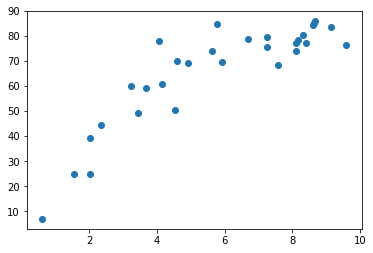

In [3]:
def make_dataset(N):
    X = np.random.random(N)*10
    means = 1 + 20*X - 1.3*X*X
    Y = np.random.normal(means, 7)
    return (X[np.newaxis,:],Y[np.newaxis,:])

data = make_dataset(30)
scatter(data[0], data[1])

data[0].shape

[[ 65.65202882]] (1, 1)
[[ 27.14737968   6.67442132]] (1, 2)
[[ -2.57220988  21.11935562  -1.34296012]] (1, 3)
[[-12.74458274  30.35945676  -3.47113706   0.13862188]] (1, 4)


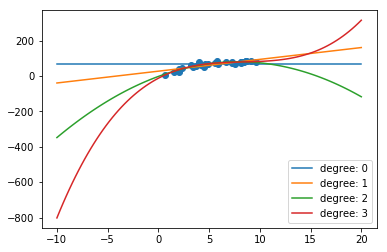

In [4]:
from numpy.linalg import inv

def powers_of_X(X, degree):
    powers = np.arange(degree + 1)[:,np.newaxis]
    return X**powers

def compute_polynomial(X, Theta):
    XP = powers_of_X(X, Theta.shape[1] - 1) # N x deg
    Y = Theta.dot(XP)
    return Y


plot_x_space = np.linspace(-10,20,100)
scatter(data[0], data[1])
for degree in range(4):
    X = powers_of_X(data[0], degree) # d x N
    Y = data[1]                      # 1 x N
    Theta = np.linalg.inv(X.dot(X.T)).dot(X).dot(Y.T).T
    plot(plot_x_space, compute_polynomial(plot_x_space, Theta).ravel(), 
         label="degree: %d" %(degree, ))
    print(Theta, Theta.shape)
legend(loc='lower right')

Found optimum at [[ 65.65197628]] in 23382 steps
Found optimum at [[ 27.14705884   6.67446787]] in 115138 steps
Found optimum at [[ -2.5710129   21.11888033  -1.34292018]] in 363504 steps


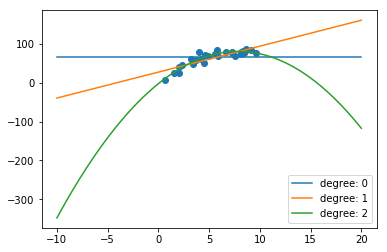

In [12]:
#
# We recommend you do the problem 5. first!
#
#

import scipy.optimize as sopt
from common.gradients import check_gradient

def polynomial_train_function(X, Y, Theta):
    Theta = Theta.reshape(1,-1)
    """Computes the least squares loss and gradient at Theta.
    
    Args:
        X: 1D array with N elements
        Y: 1D array with N elements
        Theta: 1D array with d elements
    
    Returns:
        A tuple of:
        - Loss, a float number
        - dLdT - the derivative of the loss with respect to Theta, 1D array with d elements
    """
    XP = powers_of_X(X, Theta.shape[1] - 1) # N x deg
    E = Y - Theta.dot(XP) # errors
    L = E.dot(E.T)
    assert(L.shape == (1,1))
    dLdT = -2.0 * XP.dot(E.T)
    return (L[0][0], dLdT.ravel())

# This function merely captures the datset
def polynomial_train_function_with_data(Theta):
    return polynomial_train_function(data[0], data[1], Theta)

#
# Gradient checks - feel free to add you own test points! 
#
for test_point in [[0., 0.],
                   [1., 1.],
                   [0.5, 1.0],
                   [1.0, 0.5]]:
    assert check_gradient(polynomial_train_function_with_data, np.array(test_point))

# Use your gradient function from exercise 5, or use scipy.optimize.fmin_l_bfgs_b

plot_x_space = np.linspace(-10,20,100)
scatter(data[0], data[1])
for degree in range(3):
    ThetaOpt, t_hist = GD(
        polynomial_train_function_with_data,
        np.random.random((1,degree+1)),
        alpha=1e-5,
        stop_tolerance=1e-10,
        max_steps=1e6)

    print("Found optimum at %s in %d steps" % (ThetaOpt, len(t_hist)))
    plot(plot_x_space, compute_polynomial(plot_x_space, ThetaOpt).ravel(), label="degree: %d" %(degree, ))
legend(loc='lower right')

# Problem 5 (Gradient Descent) [2p + 2 bonus p]

The Gradient Descent (GD) algorithm finds the minimum of a given
function by taking small steps along the function's gradient. In
pseudocode:

>$\Theta \leftarrow \Theta_0$

>**while** stop condition not met **do**

>$~~~~$$\Theta \leftarrow \Theta - \alpha \nabla_\Theta f(\Theta)$

>**end while**

where $f$ is the function to minimize, $\nabla_\Theta f(\Theta)$
denotes $f$'s gradient at $\Theta$ and $\alpha$ is the step size,
taking typically values from $10^{-4},\ldots,10^{-1}$.


1. **[1p]** Implement the GD algorithm as a function:

  \begin{equation}
      \Theta_{opt} = \text{GD}(f, \Theta_0, \alpha, \rho),
  \end{equation}

  where $f$ is a function returning the cost and the gradient of the
  cost with respect to parameter vector
  $\Theta$, $\Theta_0$ is the initial value, and $\alpha$
  is the step size (a.k.a. the learning rate).
  You can assume that $\alpha$
  remains constant throughout the optimization.
  Terminate when the function values will differ by less than $\rho$
  between subsequent iterations, eg. by $10^{-10}$.

2. **[1p]** Use the GD algorithm to find the optimum of the
  Rosenbrock (https://en.wikipedia.org/wiki/Rosenbrock_function) function.
  Set $(0,2)$ as the initial point. Try to set an appropriate learning rate
  $\alpha$.

  Plot the values found by GD at subsequent iterations. Set log scale for
  the Y axis.

  Plot function contours and values of $\Theta$ at subsequent
  iterations.
  
  **Note**: You can debug your implementation by using the
  gradient checking routines.
  
  Numerical optimization is of great importance,
  and many algorithms beside GD exists. Get familiar with the L-BFGS
  algorithm
  (for Python: `scipy.optimize.fmin_l_bfgs_b`). Use the
  L-BFGS algorithm to find the optimum of the Rosenbrock function
  and plot the contours and $\Theta$'s in subsequent iterations.

  How many iterations do BGD and L-BFGS need to find a point, for
  which the Rosenbrock function value is lower than $10^{-10}$?
  
3. **[2 bonus point]** Implement Newton's method (https://en.wikipedia.org/wiki/Newton's_method_in_optimization) and compare it with the previous methods. You will also need to implement a line search alogithm, e.g. (https://en.wikipedia.org/wiki/Backtracking_line_search) and make sure that the Newton's direction is indeed one along which the function is minimized (the Newton method is only guaranteed to work on convex functions, and behaves badly near critical points of non-convex functions).

In [5]:
#
# Implement the Rosenbrock function
#

from common.gradients import check_gradient

a = 1
b = 100

def rosenbrock_v(x):
    """Returns the value of Rosenbrock's function at x"""
    a = 1.0
    b = 100.0
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

def rosenbrock(x):
    """Returns the value of rosenbrock's function and its gradient at x
    """
    a = 1.0
    b = 100.0
    val = rosenbrock_v(x)
    dx = 2.0*(a - x[0])*(-1.0) + b*2.0*(x[1] - x[0]**2)*(-2.0)*x[0]
    dy = b*2.0*(x[1] - x[0]**2)
    dVdX= np.array([dx, dy])
    return (val, dVdX)

def rosenbrock_arr(x, y):
    a = 1.0
    b = 100.0
    return (a - x)**2 + b*(y - x**2)**2

#
# Feel free to add your own test points.
#
for test_point in [[0., 0.],
                   [1., 1.],
                   [0.5, 1.0],
                   [1.0, 0.5]]:
    assert check_gradient(rosenbrock, np.array(test_point), prec=1e-5)

In [6]:
#
# Fill in the details of the gradient descent
#

def GD(f, Theta0, alpha=1e-4, stop_tolerance=1e-10, max_steps=1000000):
    """Runs gradient descent algorithm on f.
    
    The baisic iteration is:
    val, dVdTheta <- f(Theta)
    Theta <- -alpha * dVdTheta
    
    Args:
        f: function that when evalueted on a Theta of same dtype and shape as Theta0
            returns a tuple (value, dVdTheta) with dValuedTheta of the same shape
            as Theta
        Theta0: starting point
        alpha: step length
        stop_tolerance: stop iterations when improvement is below this threhsold
        max_steps: maximum number of steps
        
    Returns:
        tuple:
        - ThetaOpt
        - history: list of length num_steps containing tuples (Theta, (val, dValdTheta))
    
    """
    history = []
    
    Theta = Theta0
    value = np.inf
    
    step = 0
    while step < max_steps:
        previous_value = value
        (value, gradient) = f(Theta)
        history.append( (copy(Theta), value, gradient) )
        if np.absolute(value - previous_value) < stop_tolerance:
            break
        Theta -= alpha * gradient
        step += 1
    
    return Theta, history

[alpha = 0.002512] Found optimum at [ 0.87950104  0.73368962] in 1000000 steps (true minimum is at [1,1])
[alpha = 0.000832] Found optimum at [ 0.99961266  0.99922392] in 17225 steps (true minimum is at [1,1])
[alpha = 0.000275] Found optimum at [ 0.99932674  0.99865124] in 43085 steps (true minimum is at [1,1])
[alpha = 0.000091] Found optimum at [ 0.99883042  0.99765753] in 108515 steps (true minimum is at [1,1])
[alpha = 0.000030] Found optimum at [ 0.99796886  0.99593371] in 273964 steps (true minimum is at [1,1])
[alpha = 0.000010] Found optimum at [ 0.99647445  0.9929472 ] in 681051 steps (true minimum is at [1,1])


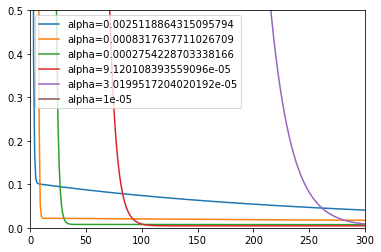

In [8]:
#
# Find the optimum
#

alphas = logspace(-2.6, -5, 6)

for al in alphas:
    X0 = np.array([0.1, 2.])
    Xopt, Xhist = GD(rosenbrock, X0, alpha=al, stop_tolerance=1e-10, max_steps=1e6)
    print("[alpha = %f] Found optimum at %s in %d steps (true minimum is at [1,1])" % (al, Xopt, len(Xhist)))

    # Plot the value over iterations
    (thetas, costs, _) = zip(*Xhist)
    plot(range(len(costs)), costs, label="alpha={0}".format(al))
axis([0, 300, 0, 0.5])
legend()

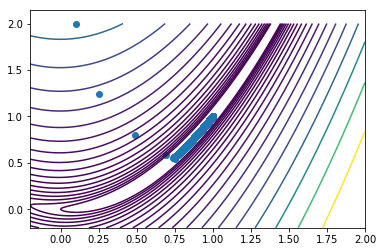

In [9]:
#
# Make a contour plot
#
# you may want to use functions: meshgrid, contour
#

X0 = np.array([0.1, 2.])
Xopt, Xhist = GD(rosenbrock, X0, alpha=1.9e-3, stop_tolerance=1e-10, max_steps=1e6)
(thetas, costs, _) = zip(*Xhist)

x_space = np.linspace(-0.2, 2.0, 200)
y_space = np.linspace(-0.2, 2.0, 200)
x_grid, y_grid = np.meshgrid(x_space, y_space)
rosen = rosenbrock_arr(x_grid, y_grid)
pyplot.contour(x_grid, y_grid, rosen, levels=np.logspace(0., 3., 20))

thetas = np.array(thetas)
pyplot.scatter(thetas[:,0], thetas[:,1])

Found optimum at [ 0.99999997  0.99999994] in 17 steps (true minimum is at [1,1])


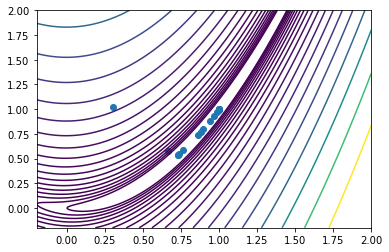

In [18]:
#
# Use scipy.optimize.fmin_l_bfgs_b
# Again plot the path on the coutnour plot
#
# Hint: to save the points you can use the callback argument!
#
#

import scipy.optimize as sopt
lbfsg_hist = []
def save_hist(x):
    lbfsg_hist.append(np.array(x))

x_start = [0.1,2.]
lbfsgb_ret = sopt.fmin_l_bfgs_b(rosenbrock, x_start, maxiter=1e6, factr=1e5, callback=save_hist)

# How many steps did l-bfgs take to optimize the Rosenbrock function?
print("Found optimum at %s in %d steps (true minimum is at [1,1])" % (lbfsgb_ret[0], len(lbfsg_hist)))


# make a conour plot, show points considered by l_bfsgb algorithm and by gradient descent.
pyplot.contour(x_grid, y_grid, rosen, levels=np.logspace(0., 3., 20))

lbfsg_hist = np.array(lbfsg_hist)
pyplot.scatter(lbfsg_hist[:,0], lbfsg_hist[:,1])

In [24]:
# Newtod-Raphson Method

def rosenbrock_hessian(x):
    #TODO compute the value, gradient and Hessian of Rosenbrock's function'
    #return [val, np.array((dvdx0, dvdx1)), H]
    pass

def Newton(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    #TODO:
    #    - implement the newton method and a simple line search
    #    - make sure your function is resilient at critical points (such as seddle points):
    #      if the Newton direction is not minimizing the function, use the gradient for a few steps
    #    - try to beat L-BFGS on the bmber of function evaluations needed!
    pass

# Problem 6 (Logistic Regression) [1p]

Linear regression is suitable for problems, where
the forecasted values are real numbers. We use logistic regression,
when we want to label the data with $0$ and $1$.

Let $x\in \mathbb{R}^n$ be a vector of $n$ real numbers, and
$y\in \{0,1\}$ the given class label. Similarly to what was shown
during the lecture, we add an additional element $x_0=1$
to vector $x$, to account for the bias term (and simplify the equations).

Similarly to linear regression, vector
$\Theta\in \mathbb{R}^{n+1}$ parametrizes the model
($n$ coefficients describes the data, the remaining one is the intercept).
In logistic regression, we model conditional probability that
sample $x$ belongs to class $1$ as:

\begin{equation}
p(\text{class}=1|x, \Theta)=h_\Theta(x) = \sigma\left(\sum_{j=0}^n \Theta_j x_j\right) 
= \sigma\left(\Theta^T x \right),
\end{equation}

where $\sigma(a) = \frac{1}{1+\exp(-a)}$ is being called the logistic sigmoid
(a function, which plot is s-curved).

An unknown sample $x$ is being labeled $1$ if
$h_\Theta(x)\geq 0.5$, or equivalently, $\Theta^T x \geq 0$.

Classification mismatch between the forecasted values and
the data is being measured most of the time with cross-entropy:

\begin{equation}
    J(\Theta) = - \sum_{i=1}^m y^{(i)} \log \left(h_\Theta (x^{(i)})\right) + (1-y^{(i)}) \log \left(1-h_\Theta (x^{(i)})\right),
\end{equation}

assuming $0\log(0)=0$.

Use logistic regression to distinguish
  _Versicolor_ and _Virginica_ irises. Use only the
  `petal length` and `petal width` features. Use either
  Gradient Descent, or L-BFGS to solve for the optimal $\Theta$.
  Prepare the scatterplot of the data and plot the class separation
  boundary found by logistic regression.

In [14]:
from sklearn import datasets
iris = datasets.load_iris()
print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


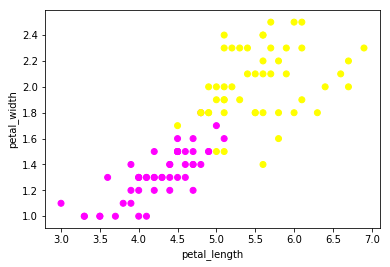

In [15]:
#Extract the petal_length and petal_width of versicolors and virginicas

IrisX = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisX = IrisX[:, iris.target!=0]

# Set versicolor=0 and virginia=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

In [ ]:
class LogisticRegressionCost(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    def sigmoid(self, z):
        return 1./(1 + exp(-z))
    
    #note: this creates a Python callable - i.e. an abject that can be called as a function
    def __call__(self, Theta):
        X = self.X
        Y = self.Y
        
        #reshape Theta
        ThetaR = Theta.reshape(X.shape[0],1) # n_features x 1
        
        Z = Theta.T.dot(X)
        nll = ...#TODO
        grad = X.dot((sigmoid(Z) - Y).T)
        
        #reshape grad into the shape of Theta, for fmin_l_bfsgb to work
        return nll, grad.reshape(Theta.shape)

iris_log_reg = LogisticRegressionCost(IrisX, IrisY)

#TODO: add afew gradient checks as in the code above!

Theta0 = np.zeros((3))

#
# Call a solver
#

ThetaOpt = TODO


#
# Now plot the found separation line 
# 

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')
pl_min, pl_max = xlim()
pl = linspace(pl_min, pl_max, 1000)
plot(pl, -(ThetaOpt[0]+ThetaOpt[1]*pl)/ThetaOpt[2])
xlim(pl_min, pl_max)

# Problem 7 [1 bonus point]

  While on a walk, you notice that a locomotive has the serial number
  50. Assuming that all locomotives used by PKP (the Polish railroad
  operator) are numbered using consecutive natural numbers, what is
  your estimate of $N$ the total number of locomotives operated by PKP?

  Tell why the Maximum Likelihood principle may not yield satisfactory
  results. 

  Use the Bayesian approach to find the posterior distribution over
  the number of locomotives. Then compute the expected count of
  locomotives. For the prior use the power law:
  \begin{equation}
  p(N) =  \frac{1}{N^\alpha}\frac{1}{\zeta(\alpha,1)},
  \end{equation}
  where the $\zeta(s,q)=\sum_{n=0}^{\infty}\frac{1}{(q+n)^s}$ is the
  Hurvitz Zeta function
  (https://en.wikipedia.org/wiki/Hurwitz_zeta_function)
  available in Python as `scipy.special.zeta`. The use of the
  power law is motivated by the observation that the frequency of
  occurrence of a company is inversely proportional to its size (see
  also: R.L. Axtell, Zipf distribution of US firm sizes
  https://www.sciencemag.org/content/293/5536/1818).
  
  How would your estimate change after seeing 5 locomotives, with the
  biggest serial number among them being 50?

  **Note**: During the Second World War, a similar problem was
  encountered while trying to estimate the total German tank
  production from the serial numbers of captured machines. The
  statistical estimates were the most precise!

# Problem 8 [2p]

  The least squares method results in estimates that approximate
  the conditional mean of the response variable given certain values
  of the predictor variables.  However, for many applications we are interested
  in a median or other percentile rather than the mean of the response
  variable. An approximation of a percentile can be achieved
  indirectly by using the least squares method to fit a model,
  assuming a gaussian distribution on residuals of this model and
  calculating the required percentile of the gaussian distribution.
  The problems with this commonly used technique appear when the
  distribution of residuals does not follow a gaussian distribution.

  The quantile regression
  (https://en.wikipedia.org/wiki/Quantile_regression) aims at
  directly estimating a value of the conditional percentile of the
  response variable. It is often use in e.g. sales forecasting, where
  we are interested in e.g. keeping enough items to have a 90% chance
  to cover the demand. In quantile regression, instead of minimizing the mean squared error,
  quantile regression minimizes a different cost function,
  which for pair $(x_i,y_i)$ is
  \begin{equation}
  f^{\tau}_i = \left\{
    \begin{array}{rl}
      \tau\cdot e_i & \text{if } e_i \geq 0,\\
      -(1-\tau)\cdot e_i & \text{if } e_i < 0,
    \end{array} \right.
  \end{equation}
  where $\tau$ is the precentile of interest, and $e_i=\theta^Tx_i - y_i$ is the residual.

1. **[2p]** Download the house pricing data set from
    http://ii.uni.wroc.pl/~jch/neuralnetworks15/lecture3/03-house-prices.csv. To
    load it into Python, you can use the `pandas.read_csv`
    function, similarly to how we read the height/weight table in the
    notebook for lecture 3.

    This data contains information about areas and prices of around
    5000 houses offered for sale. Imagine you want to buy a 60 squared
    meters flat. How much money do you need to have to be able to
    choose between $75\%$ of all flats offered for sale?
    
    Solve this problem using both methods described above and compare
    the results. 
    
    Fit a linear regression model to the dependance of a house price
    on its area using the least squares method. Fit a Gaussian
    distribution to the residuals and calculate the 75 percentile of
    this distribution (you can look it up in a percentile table, or
    use the `scipy.stats.norm.ppf` function). Check the goodness of fit
    of your model by calculating the ratio of prices below the
    estimated 75 percentile. Understand the reason of the quality of
    the model by plotting a histogram of residuals and noting that
    they do not seem to follow a Gaussian distribution.
  
    Fit a quantile regression model by minimizing the $f^{\tau}$
    function. To fit the model write a function returning the cost,
    and its derivative (you can assume that the derivative is 0 at the
    singular points).  Use the L-BFGS solver (without step size
    control the GD algorithm does not converge to good solutions). You
    can start the solver from the least squares solution. Check the
    goodness of fit as described above.

    Now you can calculate the 75 percentile price value for a 60
    squared meters flat using the more adequate model. 
    
    **Note**: Technically, we can not use a gradient-based
    optimization method to minimize the $f^{\tau}=\sum_i f^{\tau}_i$
    loss because it
    doesn't have a derivative for $e_i=0$. One solution is to use a
    subgradient method
    https://en.wikipedia.org/wiki/Subderivative. It is also
    possible to use a smooth loss function -- common variants are the
    Huber loss (https://en.wikipedia.org/wiki/Huber_loss) or a
    variant of the smooth approximation to the absolute value
    $\text{abs}(x) \approx \sqrt{x^2+\epsilon}$ with a small
    $\epsilon$. However, just ignoring the singular points tends to
    work well in practice.
  
2. **[1p]** Prove that the squared error minimization leads to
    the approximation of the mean while the minimization of the $f^{\tau}$
    function leads to the estimation of the $\tau$ percentile. 

    For a set of points on a plane find a horizontal line which minimizes the sum of
    1. squares,
    2. absolute values,
    3. $f^{\tau}$
    
    of vertical coordinates of the points.

  **Hint**: you should remember from the Algorithms and Data
  Structures course that the median minimizes a sum of absolute values
  loss function.

In [ ]:
import pandas as pd
import scipy.optimize as sopt
from scipy.stats import norm

In [ ]:
data = pd.read_csv('03-house-prices.csv', index_col=0)
data.head()

In [ ]:
X = np.vstack((np.ones_like(data.rooms), data.area))
X

In [ ]:
Y = np.asarray(data.price)[None,:]
Y

In [ ]:
# Find the least squares (linear regression) solution
ThetaLsq = TODO
print ThetaLsq

errs_lsq = ThetaLsq.T.dot(X) - Y

# Assuming a normal residual distribution, compute the 25 and 75 percentile
low_qtr, high_qtr = norm.ppf(TODO)

# Verify the assumption - observe how many residuals are blow the 25th or 75th percentile
print mean(errs_lsq), median(errs_lsq), std(errs_lsq)
print "Fraction of errs below 25 perc: %f, above 75 perc: %f" % (
    (errs_lsq<low_qtr).mean(), (errs_lsq>high_qtr).mean())

scatter(data.area, data.price, alpha=0.2)
xlim_area = xlim()
XL = np.vstack(([1.0, 1.0], xlim_area))
plot(xlim_area, XL.T.dot(ThetaLsq), label='LSQ')

# Plot confidence intervals around the prediction: prediction + high_qtr, prediction - low_qtr 
plot(xlim_area, TODO, label='LSQ25')
plot(xlim_area, TODO, label='LSQ75')
legend()
# ylim(-5000, 5000)

In [ ]:
def quant_loss(X, Y, Theta, left, right):
    """Computes the quantile loss and its derivative.
    
    The quantile loss is defined as:
    
    \sum_i loss_i(err_i)
    
    where loss_i(err_i) = abs(err_i) * left if err_i < 0 abs(err_i) * right if err_i >= 0
    
    Args:
        X: data matrix of shape d x N
        Y: targets, shape 1 x N
        Theta: parameters vector of shape N
        left, right: coefficients for negative and positive errors
        
    Returns:
        tuple of loss, gradient
    """
    ThetaR = np.asarray(Theta).reshape((X.shape[0],1))
    O = ThetaR.T.dot(X)
    E = O - Y
    loss = TODO
    grad = TODO
    return loss, grad.ravel()

check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,1), [0.,0.])
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,1), ThetaLsq.ravel(), delta=1e-8)
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,10), [0.,0.])
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,1), [1.,1.])
check_gradient(lambda Theta: quant_loss(X,Y,Theta,1,10), [1.,1.])

scatter(data.area, data.price, alpha=0.2)
xlim_area = xlim()
XL = np.vstack(([1.0,1.0], xlim_area))
plot(xlim_area, XL.T.dot(ThetaLsq), label='LSQ')

for quant in [25, 50, 75]:
    # Fill in proper values for left and right coefficients
    ThetaQuant = sopt.fmin_l_bfgs_b(lambda Theta: quant_loss(X,Y,Theta, TODO), 
                                      [0,0])[0])[0]
    print "Quant %d:" % (quant)
    print ThetaQuant
    errs_quant = Y - ThetaQuant.T.dot(X)
    print "Fraction of negative errs: %f (should be %f)" % ((errs_quant<0).mean(), quant/100.)
    
    plot(xlim_area, XL.T.dot(ThetaQuant), label='Q%d' %(quant,))

xlim(0, 250)  #xlim(0, xlim_area[1])
legend()